In [1]:
# inport
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.applications import vgg16
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [2]:
dataDir = '/kaggle/input/lung-cancer-histopathological-images'
categories = ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']


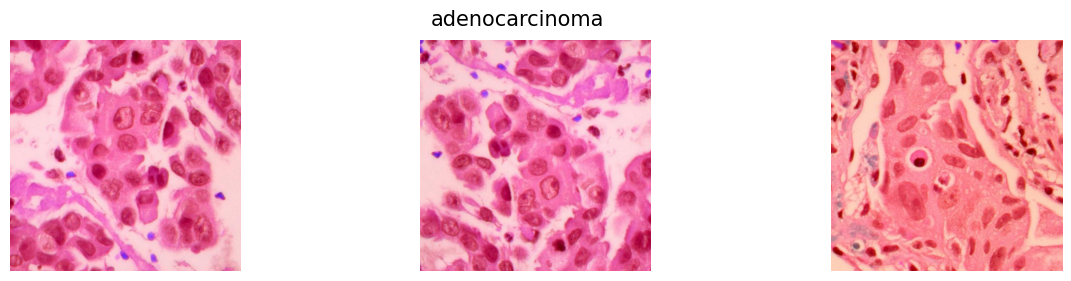

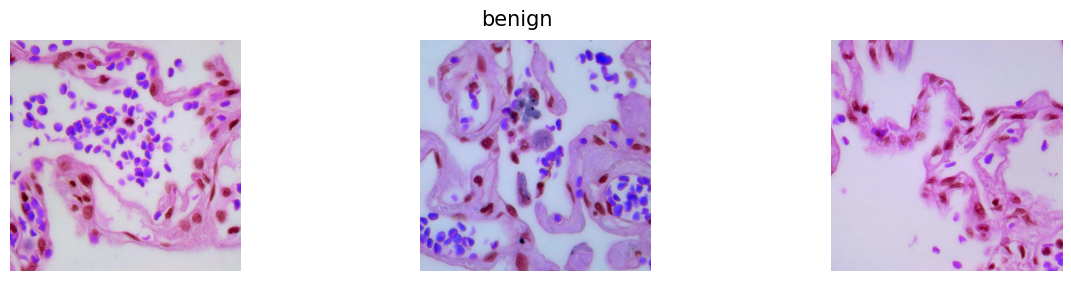

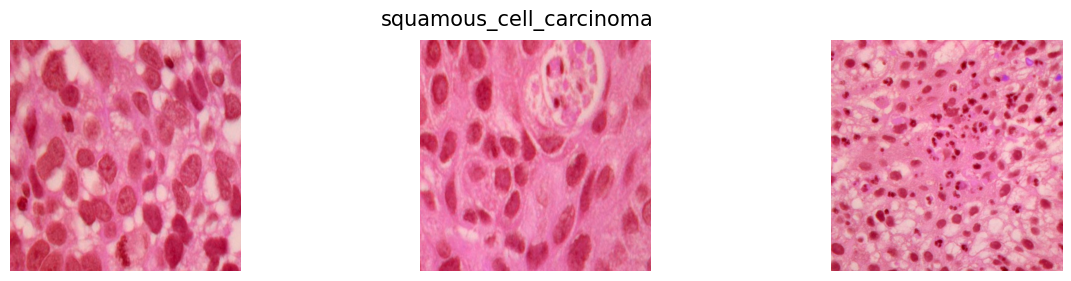

In [3]:
# Displaying 3 types of images
for cat in categories:
    path = os.path.join(dataDir, cat)
    images = os.listdir(path)

    # Initialize a subplot with 1 row and 3 columns
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    fig.suptitle(f'{cat}', fontsize=15)

    for i in range(3):
        # Randomly select an image
        img_name = images[np.random.randint(0, len(images))]
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path)

        # Display the image
        ax[i].imshow(img_array)
        ax[i].axis('off')

In [4]:
data_paths = {
    "adenocarcinoma": "/kaggle/input/lung-cancer-histopathological-images/adenocarcinoma",
    "benign": "/kaggle/input/lung-cancer-histopathological-images/benign",
    "squamous_cell_carcinoma": "/kaggle/input/lung-cancer-histopathological-images/squamous_cell_carcinoma"
}



In [5]:
# Data Preprocessing
img_height, img_width = 150, 150
batch_size = 32

# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0/255, 
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True 
)

# Load training data
train_data = datagen.flow_from_directory(
    directory=os.path.dirname(list(data_paths.values())[0]),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)
#Load validation data
val_data = datagen.flow_from_directory(
    directory=os.path.dirname(list(data_paths.values())[0]),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [6]:
# cnn model-1
from tensorflow.keras import Input

model_1 = models.Sequential([
    Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])



In [7]:
#compile cnn model-1
from tensorflow.keras.optimizers import Adam
model_1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'] 
)


In [8]:
#train the cnn model-1
history = model_1.fit(
    train_data,
    epochs=50,
    validation_data=val_data
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 256s 652ms/step - accuracy: 0.7103 - loss: 0.6572 - val_accuracy: 0.8833 - val_loss: 0.3089
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 131s 345ms/step - accuracy: 0.8671 - loss: 0.3412 - val_accuracy: 0.8803 - val_loss: 0.2866
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 132s 346ms/step - accuracy: 0.8901 - loss: 0.2820 - val_accuracy: 0.8970 - val_loss: 0.2520
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 130s 343ms/step - accuracy: 0.8834 - loss: 0.2843 - val_accuracy: 0.8907 - val_loss: 0.2540
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 133s 348ms/step - accuracy: 0.8980 - loss: 0.2536 - val_accuracy: 0.9130 - val_loss: 0.2021
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 130s 341ms/step - accuracy: 0.8955 - loss: 0.2550 - val_accuracy: 0.9177 - val_loss: 0.2130
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 129s 339ms/step - accuracy: 0.9051 - loss: 0.2300 - val_accuracy: 0.9253 - val_loss: 0.1863
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 132s 345ms/step - accuracy: 0.9090 - loss: 0.22

In [9]:
# Evaluate on validation data
val_loss, val_accuracy = model_1.evaluate(val_data)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 274ms/step - accuracy: 0.9748 - loss: 0.0984
Validation Loss: 0.0992, Validation Accuracy: 0.9697


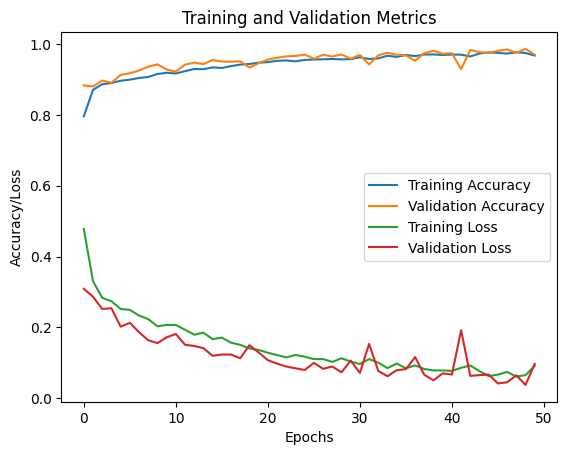

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.title('Training and Validation Metrics')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


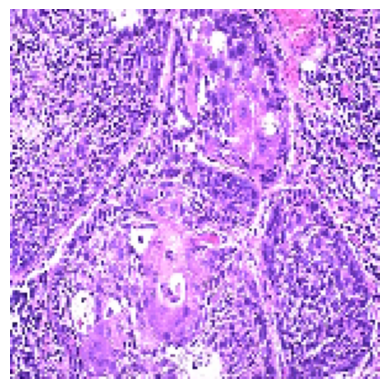

Predicted Category: adenocarcinoma.
 		    That means cancer detected.


In [11]:
# customized testing
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = "/kaggle/input/testing2/NEO095.jpg"
img = load_img(img_path, target_size=(img_height, img_width))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# check
predictions = model_1.predict(img_array)
category = list(train_data.class_indices.keys())[np.argmax(predictions)]
plt.imshow(img_array[0])
plt.axis('off')
plt.show()
if (category == 'adenocarcinoma' or category == 'squamous_cell_carcinoma'):
    print("Predicted Category:",category + ".\n \t\t    That means cancer detected.")
else:
    print("Predicted Category:",category + ".\n \t\t    That means there is no evidence of cancer.")


In [12]:
images, labels = next(val_data)

predictions = model_1.predict(images)

predicted_classes = predictions.argmax(axis=1) 

true_classes = labels.argmax(axis=1)
correct_predictions = 0
for i in range(len(images)):
    true_label = list(val_data.class_indices.keys())[true_classes[i]]
    predicted_label = list(val_data.class_indices.keys())[predicted_classes[i]]
    if true_classes[i] == predicted_classes[i]:
        correct_predictions += 1
    print(f"True label: {list(val_data.class_indices.keys())[true_classes[i]]}, Predicted: {list(val_data.class_indices.keys())[predicted_classes[i]]}\n")


accuracy = correct_predictions / len(images) * 100
print(f"\nAccuracy: {accuracy:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
True label: benign, Predicted: benign

True label: adenocarcinoma, Predicted: adenocarcinoma

True label: benign, Predicted: benign

True label: benign, Predicted: benign

True label: squamous_cell_carcinoma, Predicted: squamous_cell_carcinoma

True label: squamous_cell_carcinoma, Predicted: squamous_cell_carcinoma

True label: benign, Predicted: benign

True label: adenocarcinoma, Predicted: adenocarcinoma

True label: squamous_cell_carcinoma, Predicted: squamous_cell_carcinoma

True label: squamous_cell_carcinoma, Predicted: squamous_cell_carcinoma

True label: adenocarcinoma, Predicted: adenocarcinoma

True label: adenocarcinoma, Predicted: benign

True label: benign, Predicted: benign

True label: adenocarcinoma, Predicted: adenocarcinoma

True label: benign, Predicted: benign

True label: adenocarcinoma, Predicted: adenocarcinoma

True label: adenocarcinoma, Predicted: adenocarcinoma

True label: squamous_cell_carcinoma, Predicted: squamous_c

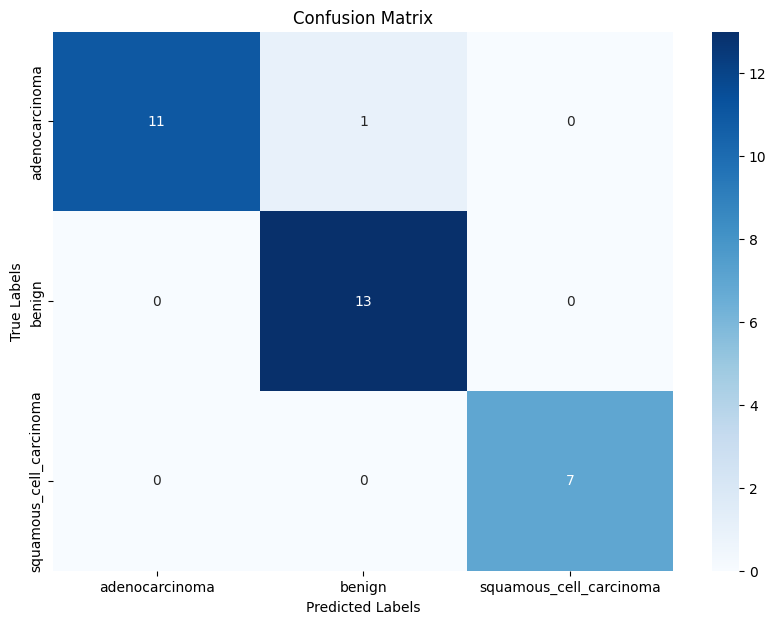

In [13]:
# Generate confusion matrix
class_labels = list(val_data.class_indices.keys())
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


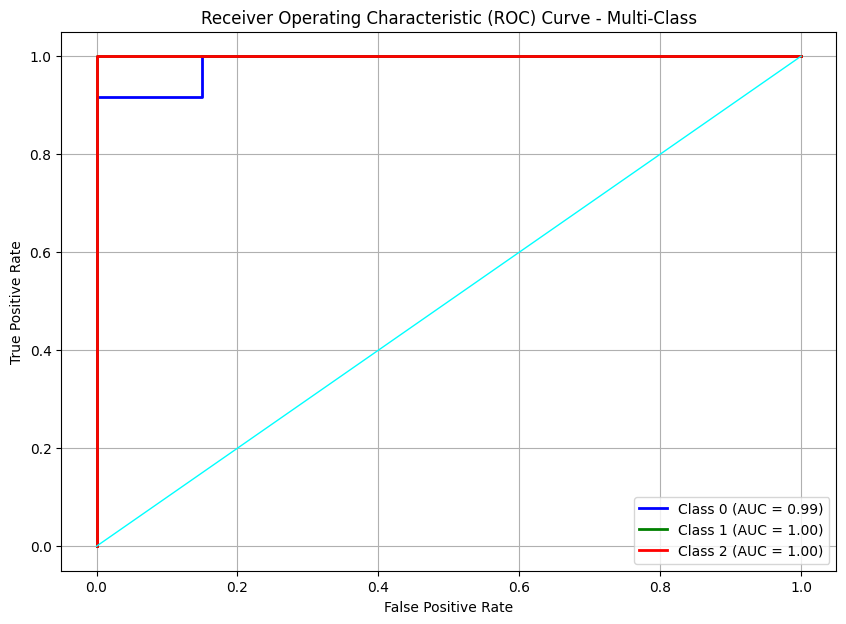

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the true labels for multi-class classification
true_classes_binarized = label_binarize(true_classes, classes=[0, 1, 2])
n_classes = true_classes_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red'] 
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='cyan', linestyle='-', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()
